# Data Analysis task

Author: Patomporn Payoungkhamdee

## Problem 1: Weather data analysis

### a) Read raw into Pandas dataframe

import all dependency

In [1]:
import math
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import fftpack

read the data and define new proper column which are the year and a day in the given year

In [2]:
df = pd.read_csv("../583201.csv", index_col=False, delimiter=r"\s+")
df['DATE'] = df.apply(lambda row: int(row.DATE), axis=1)
df['YEAR'] = df.apply(lambda row: int(str(row.DATE)[0:4]), axis=1)
df['DAY'] = df.apply(lambda row: int(str(row.DATE)[4:7]), axis=1)
print("List of NULL value in coumns", df.isnull().sum())
df

List of NULL value in coumns DATE    0
SRAD    0
TMAX    0
TMIN    0
RAIN    0
TAVE    0
YEAR    0
DAY     0
dtype: int64


,DATE,SRAD,TMAX,TMIN,RAIN,TAVE,YEAR,DAY
0,1988001,-99.0,30.5,23.0,0.0,26.8,1988,1
1,1988002,-99.0,31.6,23.3,0.0,27.5,1988,2
2,1988003,-99.0,30.6,23.2,7.7,26.9,1988,3
3,1988004,-99.0,31.6,23.5,0.9,27.6,1988,4
4,1988005,-99.0,30.7,20.1,0.3,25.4,1988,5
5,1988006,-99.0,30.2,23.0,0.5,26.6,1988,6
6,1988007,-99.0,31.3,21.9,0.0,26.6,1988,7
7,1988008,-99.0,31.3,21.3,0.0,26.3,1988,8
8,1988009,-99.0,31.2,22.0,9.5,26.6,1988,9
9,1988010,-99.0,30.6,23.0,0.0,26.8,1988,10


### b) Overview of our data

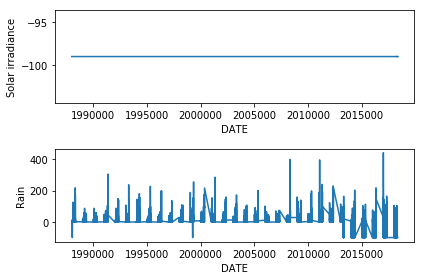

In [3]:
fig, axs = plt.subplots(2)
axs[0].plot(df['DATE'], df['SRAD'])
axs[0].set(xlabel='DATE', ylabel='Solar irradiance')

axs[1].plot(df['DATE'], df['RAIN'])
axs[1].set(xlabel='DATE', ylabel='Rain')

plt.tight_layout()
plt.show()

In [4]:
print("# of Solar_IRR at -99 is {}, # of all columns : {}".format(df.query('SRAD == -99.0').shape[0], df['SRAD'].shape[0]))

# of Solar_IRR at -99 is 11262, # of all columns : 11262


The solar radiation is exactly the same value. It is really weird to have the same solar radiation for more then twenty years.

According to the second figure, rain feature is fluctuate quite periodically which might cause from the season during the whole year where we have rainy and summer.
Rain data is more interesting in the last six year, there are many period of time that this rate is highly unstable. I would say that it is even worse that there are many gap of time that contains a negative values as well as the two negative values on 1990 and 1998. The reason why precipitation is negative could not explicitly demonstrate, it probably came from the detector mechanical that someshow malfunction in the same pattern because all those negative value are alomost the same scale.

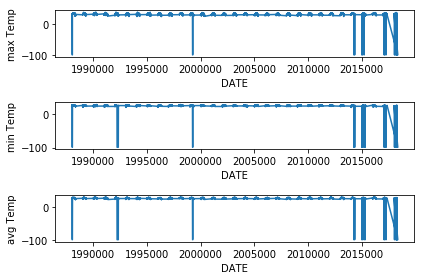

In [5]:
fig, axs = plt.subplots(3)
axs[0].plot(df['DATE'], df['TMAX'])
axs[0].set(xlabel='DATE', ylabel='max Temp')
axs[1].plot(df['DATE'], df['TMIN'])
axs[1].set(xlabel='DATE', ylabel='min Temp')
axs[2].plot(df['DATE'], df['TAVE'])
axs[2].set(xlabel='DATE', ylabel='avg Temp')
plt.tight_layout()
plt.show()

For the temperature, the periodic of small fluctuation along the positive neutral temperature could roughly summarize that it came the season during the year.
Outlier temperature that are explicitly outstanding in the negative 100 celcious does not make any sense for me.
Sri Sakhet never has that kind of cold.. well if it really happen, we would see that people are dying and it gonna be a big heading news. If you ask me a reason, I would answer the same as the previous discussion.

### c) Correlation Matrix

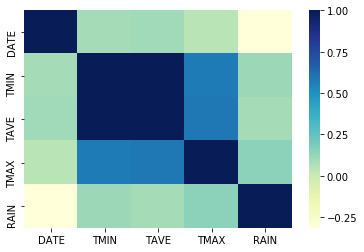

In [6]:
corr = df[['DATE', 'TMIN','TAVE', 'TMAX',  'RAIN']].corr()
# plot the heatmap
sns.heatmap(corr,  xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu");

Since SRAD is constant then we have should have no correlation related to any feature.
Here are the list of my spot
- The negative correlation of rain and year tell us that when time goes by, rain rate is decrease but still not robsust to say since we know that the negative rain rate occur during last ten years
- All of the temperature are highly correlated as we might expected

### d) FFT of average temperature and interpretation

Let start with the unit test for checking the correctness of the code with a trivial case of FFT

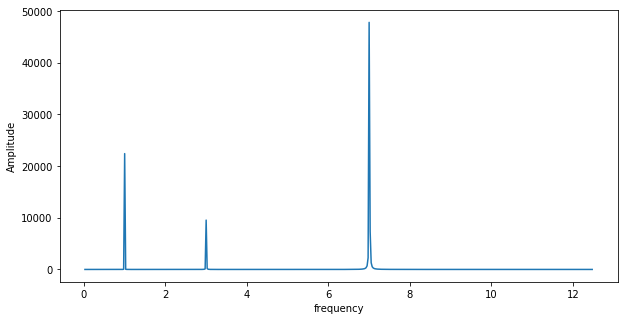

In [7]:
# unit test for fourier transform

frequency1, A1 = 1, 0.3
frequency2, A2 = 3, 0.2
frequency3, A3 = 7, 0.5

N = 1000
f = 1/N
x_begin = -20
x_end = 20

x = np.linspace(x_begin, x_end, N)
y = A1*np.sin(2*math.pi*frequency1*x) + A2*np.sin(2*math.pi*frequency2*x) + A3*np.sin(2*math.pi*frequency3*x)

ft_TAVE = fftpack.fft(y)
norm_ft_TAVE = np.square(np.abs(ft_TAVE))

freqs = fftpack.fftfreq(len(norm_ft_TAVE), (x_end - x_begin) / N)
i = freqs > 0

plt.figure(figsize=(10,5))
plt.ylabel('Amplitude')
plt.xlabel('frequency')
plt.plot(freqs[i], norm_ft_TAVE[i])
plt.show()

The result is make sense, then let exploit the same technique with our data

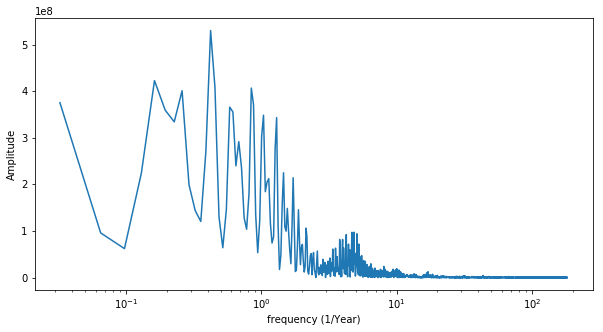

In [8]:
N = df['TAVE'].shape[0]
sampling_frequency = 1. / 365.25 # measure once a day in a year

ft_TAVE = fftpack.fft(df['TAVE'])
norm_ft_TAVE = np.square(np.abs(ft_TAVE))

freqs = fftpack.fftfreq(len(norm_ft_TAVE), sampling_frequency)
i = freqs > 0

plt.figure(figsize=(10,5))
plt.xscale('log')
plt.ylabel('Amplitude')
plt.xlabel('frequency (1/Year)')
plt.plot(freqs[i], norm_ft_TAVE[i])
plt.show()

The result has shown that there are small chunk around 1/Year = 5 which has year period around 0.25 year that could approximately be a season.

The peak around period around 2.5 year (1/Year = 0.4) is also remarkable for the cycles of average temperature. It is also interesting that might leading to the question on what cause those period of year.

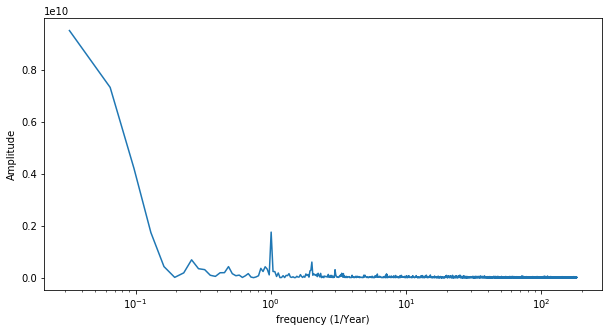

In [9]:
N = df['RAIN'].shape[0]
sampling_frequency = 1. / 365.25 # measure once a day in a year

ft_TAVE = fftpack.fft(df['RAIN'])
norm_ft_TAVE = np.square(np.abs(ft_TAVE))

freqs = fftpack.fftfreq(len(norm_ft_TAVE), sampling_frequency)
i = freqs > 0

plt.figure(figsize=(10,5))
plt.xscale('log')
plt.ylabel('Amplitude')
plt.xlabel('frequency (1/Year)')
plt.plot(freqs[i], norm_ft_TAVE[i])
plt.show()

In my point of vire, another interesting thing to consider is the rain.
By intuition, the rain should has a peak around 1 year which is essentially a rainy season during the year.

### e) Average Probability of rain in 2020

In [10]:
rainy_day = df.query('RAIN > 0 and YEAR == 2000').shape[0]
all_day = df.query('YEAR == 2000').shape[0]
print("Average Probability of rain in 2020 is around {0:.2f} %".format(100*rainy_day/all_day))

Average Probability of rain in 2020 is around 46.17 %


### f) Median of minimum temperature in October

In [11]:
df['MONTH'] = df.apply(lambda row:
    int((datetime.datetime(int(row.YEAR), 1, 1) + datetime.timedelta(days=row.DAY-1)).month),
axis=1)
df.query('MONTH == 8')['TMIN'].value_counts()

 23.0    82
 23.5    82
 24.0    58
 22.5    39
 23.6    38
 24.5    37
 23.2    37
 24.2    36
 23.7    35
 23.4    35
 23.1    34
-99.0    33
 23.8    31
 23.3    26
 22.9    26
 23.9    24
 22.6    24
 22.8    20
 22.0    19
 24.4    18
 25.0    18
 24.3    17
 24.6    17
 24.1    16
 22.7    16
 24.9    14
 22.2    14
 22.4    14
 21.5    10
 24.7     9
 25.5     8
 22.1     7
 25.2     6
 24.8     6
 21.3     5
 21.6     5
 21.9     5
 21.8     5
 21.7     4
 22.3     4
 25.4     3
 25.1     3
 21.0     3
 25.3     3
 25.6     2
 25.9     2
 21.1     2
 26.0     2
 25.8     1
 20.4     1
 20.5     1
 21.2     1
 20.7     1
 20.8     1
 20.3     1
Name: TMIN, dtype: int64

The answer is explicitly shown in the list above, the median of TMIN in OCTOBER is 23 C.

## Problem 2: Deep Learning